# News Mood

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitter_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
sources =  ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]


tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}





# Grab 100 tweets

for x in range(5):

    # Loop through all news sources
    for source in sources:

        # Grab the tweets
        public_tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in public_tweets:
#             print(source)
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

#         # Add each value to the appropriate array
#          tweet_data.append({"Twitter Account":source,"Date": tweet["created_at"],"tweet_text": tweet["text"],
#                            "Compound": compound,
#                            "Positive": pos,
#                            "Negative": neu,
#                             "Neutral": neg,
#                             "Tweets Ago": counter})
            tweet_data["tweet_source"].append(source)
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
# #      # Add to counter 
# #         print(source + " :"+str(counter))
# #         print("------------")
# #         print(pos)
# #         print(neu)
# #         print(neg)
    
# #         counter = counter + 1

In [3]:
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

In [4]:
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [5]:
# Convert dates (currently strings) into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,BBCWorld,"RT @BBCSteveR: ""And just as our country was tr...",2018-07-06 07:37:33,-0.0258,0.124,0.749,0.127
1,BBCWorld,RT @BBCSport: Brazil's Danilo has been ruled o...,2018-07-06 09:01:30,0.0000,0.000,1.000,0.000
2,BBCWorld,"RT @BBCSteveR: Meanwhile, 2000 miles from Ames...",2018-07-06 09:03:32,0.0000,0.000,1.000,0.000
3,BBCWorld,RT @BBCSport: 'Uruguayans are literally prayin...,2018-07-06 09:11:48,0.3612,0.102,0.898,0.000
4,BBCWorld,Israel recovers hanged spy Eli Cohen's watch f...,2018-07-06 09:22:02,0.0000,0.000,1.000,0.000


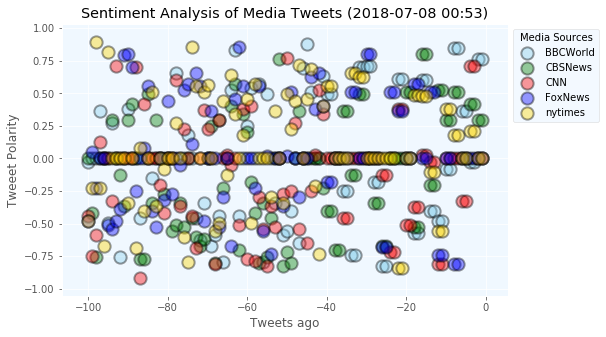

In [8]:
import time


# create the scatter graph
plt.figure(figsize=(8,5))
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBCWorld"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBCWorld"]["tweet_vader_score"],
            edgecolor="black", marker="o", color="skyblue", linewidth= 2, alpha=0.4,s =150,
            label="BBCWorld")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBSNews"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBSNews"]["tweet_vader_score"],
            edgecolor="black",  marker="o", color="green", linewidth= 2, alpha=0.4,s =150, 
            label="CBSNews")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", marker="o", color="red", linewidth= 2, alpha=0.4,s =150,
            label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "FoxNews"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "FoxNews"]["tweet_vader_score"],
            edgecolor="black",  marker="o", color="b", linewidth= 2, alpha=0.4,s =150,
            label="FoxNews")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "nytimes"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "nytimes"]["tweet_vader_score"],
            edgecolor="black",  marker="o", color="gold", linewidth= 2, alpha=0.4,s =150, 
            label="nytimes")

plt.xlabel('Tweets ago')
plt.ylabel('Tweeet Polarity')
plt.title(f"Sentiment Analysis of Media Tweets ({datetime.now().strftime('%Y-%m-%d %H:%M')})")
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1), loc="best", ncol=1, title="Media Sources")


plt.savefig('Twitter.png')
plt.show()

In [13]:
BBC_mean=np.mean(tweet_df[tweet_df["tweet_source"] == "BBCWorld"]['tweet_vader_score'])
CNN_mean=np.mean(tweet_df[tweet_df["tweet_source"] == "CBSNews"]['tweet_vader_score'])
CBS_mean=np.mean(tweet_df[tweet_df["tweet_source"] == "CBSNews"]['tweet_vader_score'])
Fox_mean=np.mean(tweet_df[tweet_df["tweet_source"] == "FoxNews"]['tweet_vader_score'])
NY_mean=np.mean(tweet_df[tweet_df["tweet_source"] == "nytimes"]['tweet_vader_score'])


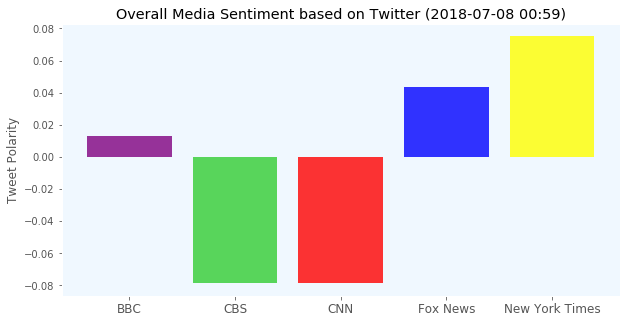

In [14]:
# Creat a bar graph
y_axis=[BBC_mean,CBS_mean,CNN_mean,Fox_mean,NY_mean]
x_axis=np.arange(len(y_axis))
plt.figure(figsize=(10,5))
plt.bar(0, BBC_mean, color='purple', align="edge", alpha=0.8)
plt.bar(1, CBS_mean, color='limegreen', align="edge", alpha=0.8)
plt.bar(2, CNN_mean, color='red', align="edge", alpha=0.8)
plt.bar(3, Fox_mean, color='blue', align="edge", alpha=0.8)
plt.bar(4, NY_mean, color='yellow', align="edge", alpha=0.8)
tick_locations=[i+0.4 for i in x_axis] 
plt.xticks(tick_locations,["BBC","CBS","CNN","Fox News","New York Times"],size="large")
plt.title(f"Overall Media Sentiment based on Twitter ({datetime.now().strftime('%Y-%m-%d %H:%M')})")
plt.ylabel("Tweet Polarity")
plt.grid(False)
plt.savefig("Twitter Sentiment.png")
plt.show()

## Insights

1. Based on the overall sentiment, CBS and CNN have negative sentiment in the last 100 tweets compared to the others(This was not the case a few months ago) - Mostly it is a perception of how the news is presented
2. Based on the scatter plot, it was difficult to conclude if one was better that the other. Overall, there were consistant neutral, positive and negative scores for all sources.##### 